Datos cargados desde MongoDB correctamente.
Total de registros: 3000

Vista previa de los datos:

  id_paciente       nombre  edad sexo     distrito     servicio  \
0       P0001   Luis Pérez  45.0    F   Miraflores  Odontología   
1       P0002   Pedro Ruiz  45.0    F   Miraflores      General   
2       P0003  Carlos Díaz  45.0    M   San Isidro   Emergencia   
3       P0004  María López  45.0    F   Miraflores    Pediatría   
4       P0005  Jorge Salas  45.0    F  Desconocido  Laboratorio   

  fecha_atencion       monto  
0     2024-02-03  274.247207  
1     2023-10-23  274.247207  
2     2023-08-10  274.247207  
3     2024-07-02  119.790000  
4     2023-01-31  233.080000  


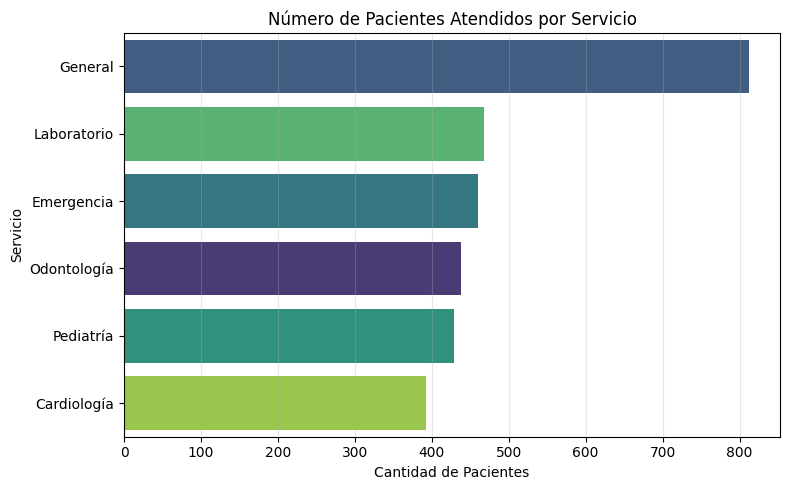

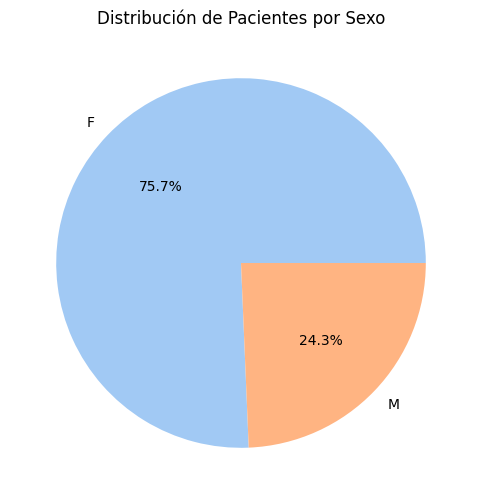

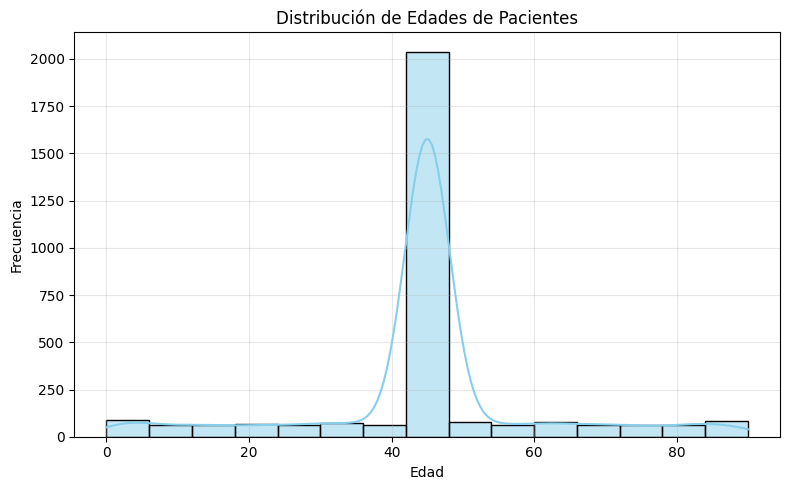


Promedio de montos por distrito:
 distrito
San Borja      276.112517
San Isidro     275.682071
Miraflores     275.171695
Desconocido    274.312648
Surco          272.440558
La Molina      271.605911
Name: monto, dtype: float64


In [1]:
import pandas as pd
from pymongo import MongoClient
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Conectar a MongoDB
client = MongoClient("mongodb://localhost:27017/")
db = client["SaludDigital_2025"]
collection = db["pacientes"]

# Leer los datos desde MongoDB y convertirlos a DataFrame
data = list(collection.find({}, {"_id": 0}))
df = pd.DataFrame(data)
print("Datos cargados desde MongoDB correctamente.")
print(f"Total de registros: {len(df)}\n")

# Crear carpeta para guardar gráficos
reports_path = Path.cwd() / "../reports"
reports_path.mkdir(parents=True, exist_ok=True)

# Vista previa
print("Vista previa de los datos:\n")
print(df.head())

# Gráfico de barras: número de pacientes atendidos por servicio
plt.figure(figsize=(8,5))
sns.countplot(
    y="servicio",
    hue="servicio",
    data=df,
    order=df["servicio"].value_counts().index,
    palette="viridis",
    legend=False
)
plt.title("Número de Pacientes Atendidos por Servicio")
plt.xlabel("Cantidad de Pacientes")
plt.ylabel("Servicio")
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig(reports_path / "pacientes_atendidos_por_servicio.png")
plt.show()

# Gráfico circular: distribución por sexo
sexo_counts = df["sexo"].value_counts()
plt.figure(figsize=(6,6))
plt.pie(sexo_counts, labels=sexo_counts.index, autopct='%1.1f%%', colors=sns.color_palette("pastel"))
plt.title("Distribución de Pacientes por Sexo")
plt.savefig(reports_path / "distribucion_por_sexo.png")
plt.show()

# Histograma: distribución de edades
plt.figure(figsize=(8,5))
sns.histplot(df["edad"], bins=15, kde=True, color='skyblue')
plt.title("Distribución de Edades de Pacientes")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(reports_path / "distribucion_de_edades.png")
plt.show()

# Reporte tabular: promedio de montos por distrito
promedio_monto = df.groupby("distrito")["monto"].mean().sort_values(ascending=False)
print("\nPromedio de montos por distrito:\n", promedio_monto)
promedio_monto.to_csv(reports_path / "promedio_de_montos_por_distrito.csv")